# Projeto Machine Learning

Glossário do conjunto de dados (em colunas)

- ID do cliente – identificador exclusivo para cada cliente
- Idade - Idade do cliente
- Gênero - Gênero do cliente (Masculino/Feminino)
- Item comprado - O item comprado pelo cliente
- Categoria - Categoria do item adquirido
- Valor da compra (USD) - O valor da compra em USD
- Local – Local onde a compra foi realizada
- Tamanho - Tamanho do item adquirido
- Cor – Cor do item adquirido
- Temporada - Temporada durante a qual a compra foi feita
- Avaliação de revisão - Classificação dada pelo cliente para o item comprado
- Status da Assinatura - Indica se o cliente possui uma assinatura (Sim/Não)
- Tipo de Envio - Tipo de envio escolhido pelo cliente
- Desconto Aplicado - Indica se foi aplicado desconto na compra (Sim/Não)
- Código Promocional Usado - Indica se um código promocional foi usado para a compra (Sim/Não)
- Compras Anteriores - Número de compras anteriores realizadas pelo cliente
- Método de pagamento - método de pagamento preferido do cliente
- Frequência de Compras - Frequência com que o cliente faz compras (por exemplo, Semanal, Quinzenal, Mensal)

In [52]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [53]:
local = True

caminho = "./datasets/marketing_campaign (1).csv" if local else '/content/drive/MyDrive/Projeto - Machine Learning II/shopping_trends.csv'

df = pd.read_csv(caminho)

In [54]:
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


## Conhecendo os Dados

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

In [12]:
df.describe()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
count,2240
unique,2240
top,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
freq,1


In [13]:
# Percorrer colunas categóricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['object']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{'ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse': 2240}


In [14]:
# Percorrer colunas numéricas para a contagem de valores exclusivos

unique_value_counts = {}

for column in df.select_dtypes(include=['int64', 'float']):
    unique_values = df[column].nunique()
    unique_value_counts[column] = unique_values

print(unique_value_counts)

{}


## Limpeza dos Dados

In [15]:
df.isnull().sum()

ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: int64

In [16]:
df[df.duplicated()].sum()

ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: object

## Análise Exploratória

# Thiago - XGBoost
---

In [23]:
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing




## Análise inicial e tratamento do dataset


Carregando o arquivo correto que representa o dataset

In [17]:
df_t = pd.read_csv("./datasets/dataset_cluster (3).csv")

In [18]:
df_t.shape

(2212, 36)

In [19]:
df_t

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Partner,Family_Size,Age_Category,MntTotal,cluster,Cluster
0,5524,1957,Graduated,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,66,Not Partner,1,Elderly,1617,1,1
1,2174,1954,Graduated,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,69,Not Partner,3,Elderly,27,3,3
2,4141,1965,Graduated,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,58,Partner,2,Adult,776,2,2
3,6182,1984,Graduated,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,39,Partner,3,Adult,53,0,0
4,5324,1981,Post Graduated,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,42,Partner,3,Adult,422,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,Graduated,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,56,Partner,3,Adult,1341,2,2
2208,4001,1946,Post Graduated,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3,77,Partner,5,Elderly,444,3,3
2209,7270,1981,Graduated,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0,42,Not Partner,1,Adult,1241,1,1
2210,8235,1956,Post Graduated,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,67,Partner,3,Elderly,843,3,3


Eliminaremos colunas duplicadas no dataset e adicionaremos os dummies das features exclusivamente categóricas

In [20]:
# Eliminando a coluna de data de cadastro do cliente
df_t = df_t.drop(columns=["Dt_Customer"])

# Eliminando a coluna de cluster duplicada
df_t = df_t.drop(columns=["cluster"])

In [21]:
cat_columns = df_t.select_dtypes(include=["object"]).columns.values
df_t = pd.get_dummies(df_t, columns = cat_columns, prefix = cat_columns)
df_t

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,Family_Size,MntTotal,Cluster,Education_Graduated,Education_Not Graduated,Education_Post Graduated,Partner_Not Partner,Partner_Partner,Age_Category_Adult,Age_Category_Elderly,Age_Category_Young
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,66,1,1617,1,True,False,False,True,False,False,True,False
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,69,3,27,3,True,False,False,True,False,False,True,False
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,58,2,776,2,True,False,False,False,True,True,False,False
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,39,3,53,0,True,False,False,False,True,True,False,False
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,42,3,422,2,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1,56,3,1341,2,True,False,False,False,True,True,False,False
2208,4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,3,77,5,444,3,False,False,True,False,True,False,True,False
2209,7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,0,42,1,1241,1,True,False,False,True,False,True,False,False
2210,8235,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1,67,3,843,3,False,False,True,False,True,False,True,False


## Treinamento inicial e primeiras tentativas com o modelo

Separando os dados em treino e teste

In [25]:
df_X = df_t.drop(["Cluster"], axis=1)

df_y = df_t["Cluster"]

X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_y, random_state=42)

Verificando a proporção da divisão entre os dados de treino e teste

In [26]:
X_test.shape[0]/X_train.shape[0]

0.3333333333333333

Instanciando o primeiro classificador e verificando que ele é baseado no sklearn

In [27]:
classificador_xgb = xgb.XGBClassifier()
type(classificador_xgb)

xgboost.sklearn.XGBClassifier

Observando o resultado inicial do cross_val_score, para observar como o modelo performa em diferentes cenários e tirando a média

In [28]:
from sklearn.model_selection import cross_val_score
resultado_cv = cross_val_score(classificador_xgb, X_train, Y_train, cv=10)
resultado_cv

array([0.96385542, 0.9939759 , 0.96987952, 0.95180723, 0.96385542,
       0.96987952, 0.97590361, 0.95783133, 0.98192771, 0.92727273])

Definidindo a primeira medida de acurácia

In [29]:

acuracia_cv = resultado_cv.mean()
acuracia_cv = 100*round(acuracia_cv, 4)
acuracia_cv

96.56

Observando que a instância do classificador detecta automaticamente que estamos utilizando mais de uma classe como target

In [30]:
classifier = xgb.XGBClassifier()
classifier.objective


'binary:logistic'

In [31]:
classifier = xgb.XGBClassifier().fit(X_train, Y_train)
classifier.objective

'multi:softprob'

Observando o cross_val_score com a max_depth alterada

In [32]:
classificador_xgb_max_depth = xgb.XGBClassifier(max_depth=2)

100*cross_val_score(classificador_xgb_max_depth, X_train, Y_train).mean()

96.92443489971974

## Definindo as funções de visualização gráfica do modelo

In [33]:
def fit(model, x=X_train, y=Y_train):
    return model.fit(x, y)


def matrix(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    return metrics.confusion_matrix(y, predict, normalize="pred")

def accuracy(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    return metrics.accuracy_score(y, predict)


def c_report(model, x=X_test, y=Y_test):
    predict = model.predict(x)
    report = metrics.classification_report(y, predict)
    return report

def plot_matrix(model, xt=X_test, yt=Y_test, xtr=X_train, ytr=Y_train, treino=False):
    (x, y) = (xtr, ytr) if treino else (xt, yt)
    cm = matrix(model, x, y)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, vmin=0, vmax=1)
    plt.ylabel("Realidade", size=14)
    plt.xlabel("Previsão", size=14)
    titulo = f"Métricas de Precisão\n\nAccuracy Score: {accuracy(model, x, y)*100:.2f}"
    plt.title(titulo, size=15)
    plt.show()

    print(c_report(model, x, y))


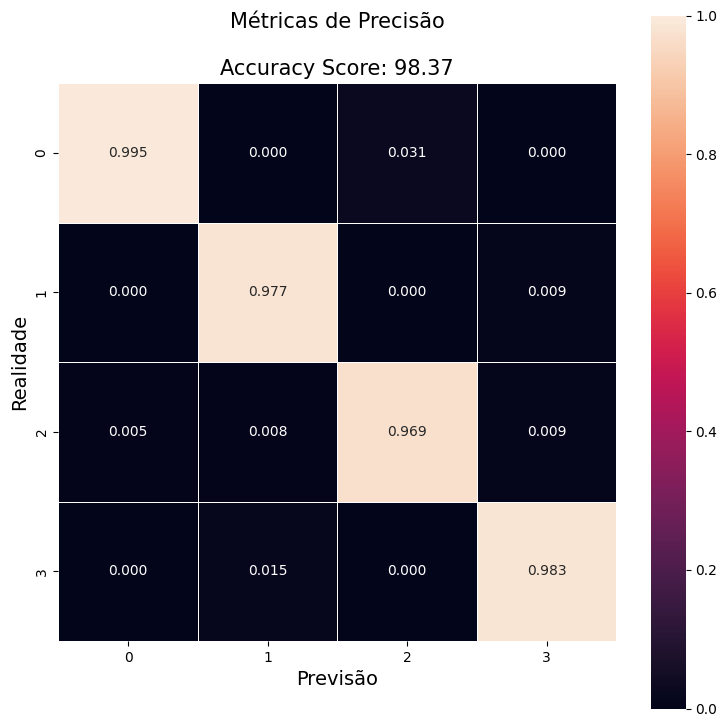

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       207
           1       0.98      0.99      0.98       131
           2       0.97      0.97      0.97        98
           3       0.98      0.98      0.98       117

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



In [34]:
modelo = fit(classificador_xgb_max_depth)

plot_matrix(modelo)

Observando os dados na divisão de treino do dataset (alto overfit)

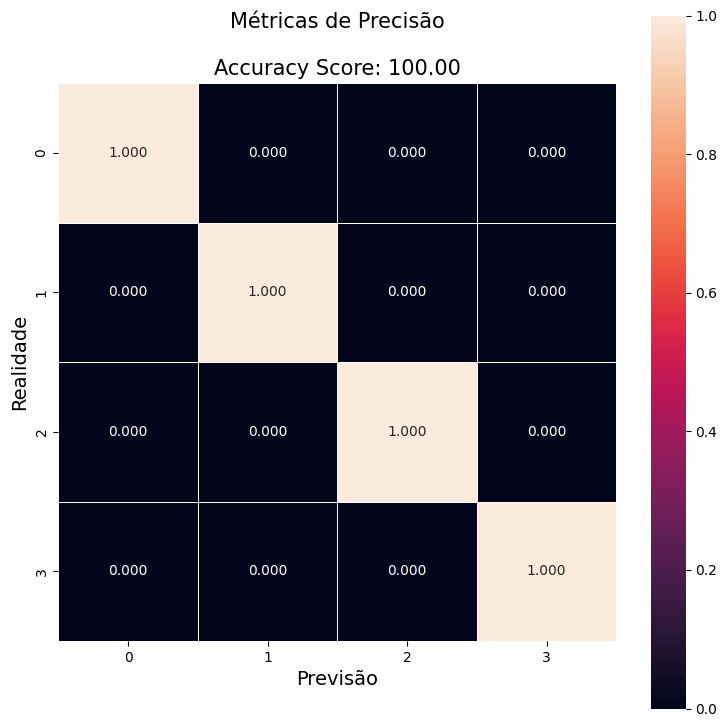

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       361
           2       1.00      1.00      1.00       317
           3       1.00      1.00      1.00       369

    accuracy                           1.00      1659
   macro avg       1.00      1.00      1.00      1659
weighted avg       1.00      1.00      1.00      1659



In [35]:
plot_matrix(modelo, treino=True)

Testando o método dart, foi observado um grande tempo de treinamento e uma performance pior no geral

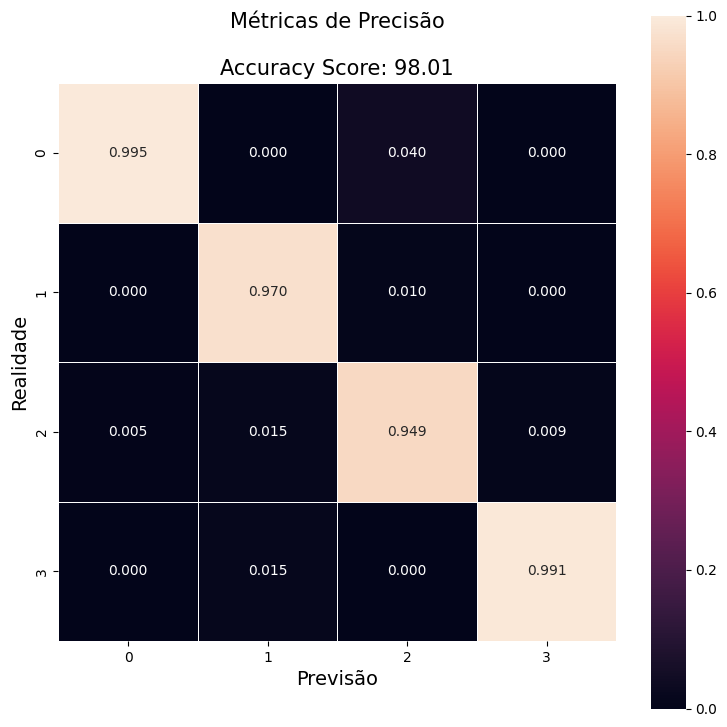

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       207
           1       0.97      0.99      0.98       131
           2       0.95      0.96      0.95        98
           3       0.99      0.98      0.99       117

    accuracy                           0.98       553
   macro avg       0.98      0.98      0.98       553
weighted avg       0.98      0.98      0.98       553



In [36]:
classificador_gbtree = xgb.XGBClassifier(booster="dart",maxdepth=2)
modelo = fit(classificador_gbtree)
plot_matrix(modelo)

## Observando o gráfico de feature importance

In [2]:
modelo = joblib.load("modelos/modelo_gs")

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

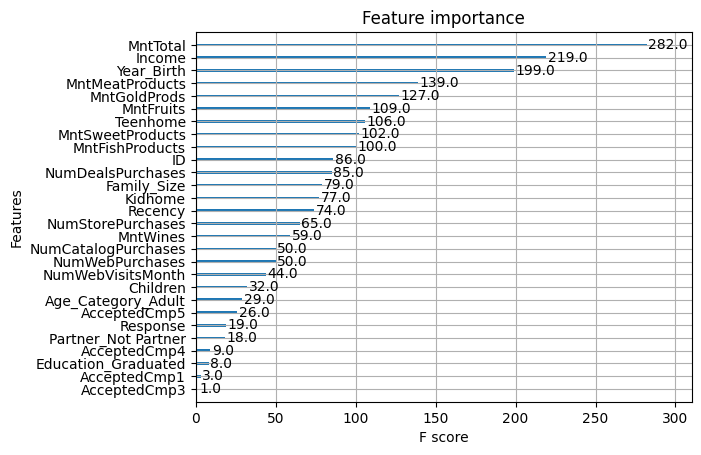

In [37]:
from xgboost import plot_importance

plot_importance(modelo)

## Executando o gridsearch


Como o modelo anterior apresentava um claro overfit, realizamos o gridsearch para buscar parâmetros diferentes e testar a performance deles


In [38]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'booster': ["gbtree", "dart"]
}

modelocv = xgb.XGBClassifier(n_jobs=3)

grid_search = GridSearchCV(modelocv, param_grid, cv=5, scoring='accuracy',verbose=10)

gs = grid_search.fit(X_train, Y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'learning_rate\': [0.1, 0.01, 0.001],\n    \'max_depth\': [4, 6, 8],\n    \'n_estimators\': [100, 200, 300],\n    \'booster\': ["gbtree", "dart"]\n}\n\nmodelocv = xgb.XGBClassifier(n_jobs=3)\n\ngrid_search = GridSearchCV(modelocv, param_grid, cv=5, scoring=\'accuracy\',verbose=10)\n\ngs = grid_search.fit(X_train, Y_train)\n'

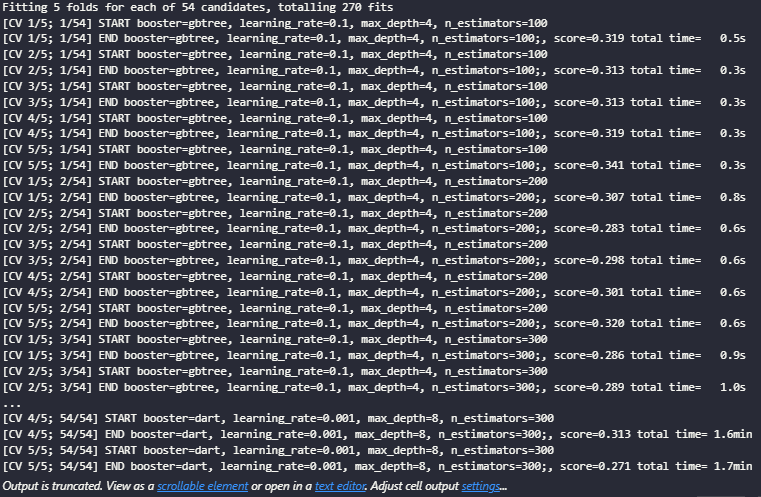

O GridSearch demorou 113min para ser completado, com o melhor modelo em:

'booster': 'gbtree',

'learning_rate': 0.01,

'max_depth': 4,

'n_estimators': 100

## Modelo final e conclusões

Carregando o modelo da persitência em disco

In [39]:
modelo = joblib.load("modelos/modelo_gs")

Plotando a matriz de confusão

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

def confusion(model, xtest=X_test, ytest=Y_test):
    fig, ax = plt.subplots(figsize=(8,8));
    y_pred_test = model.predict(xtest)
    ConfusionMatrixDisplay.from_predictions(ytest, y_pred_test, ax=ax, cmap="magma")
    plt.title("Matriz de confusão no dataframe de teste")
    plt.show()

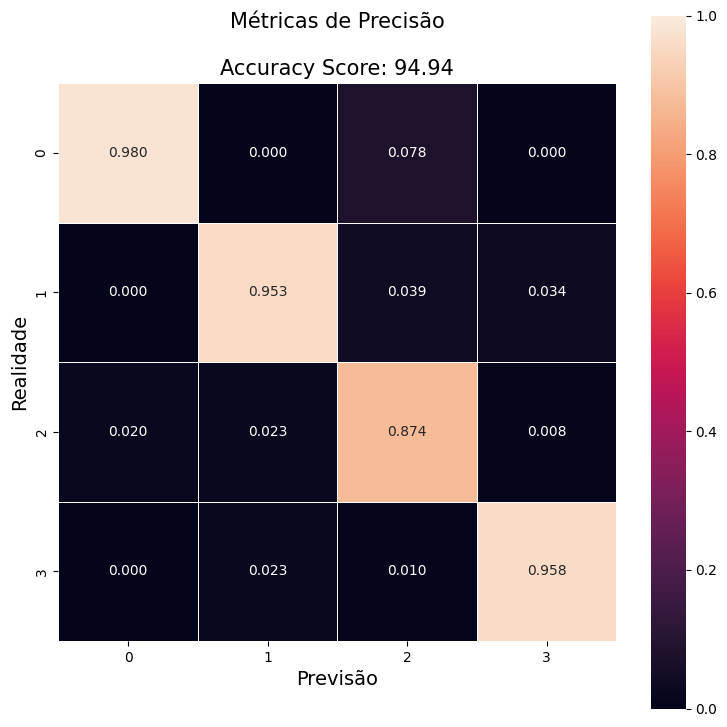

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       207
           1       0.95      0.94      0.95       131
           2       0.87      0.92      0.90        98
           3       0.96      0.97      0.96       117

    accuracy                           0.95       553
   macro avg       0.94      0.95      0.94       553
weighted avg       0.95      0.95      0.95       553



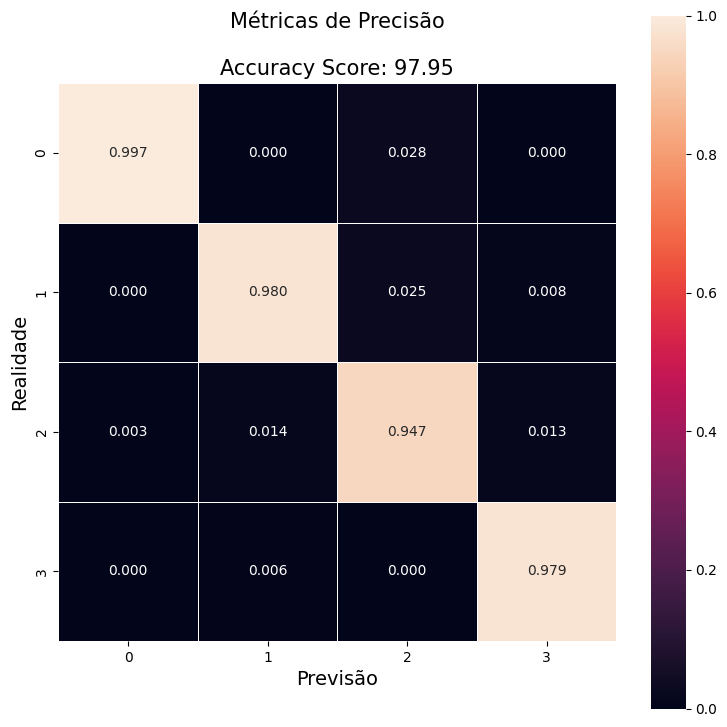

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       612
           1       0.98      0.97      0.97       361
           2       0.95      0.96      0.95       317
           3       0.98      0.99      0.99       369

    accuracy                           0.98      1659
   macro avg       0.98      0.98      0.98      1659
weighted avg       0.98      0.98      0.98      1659



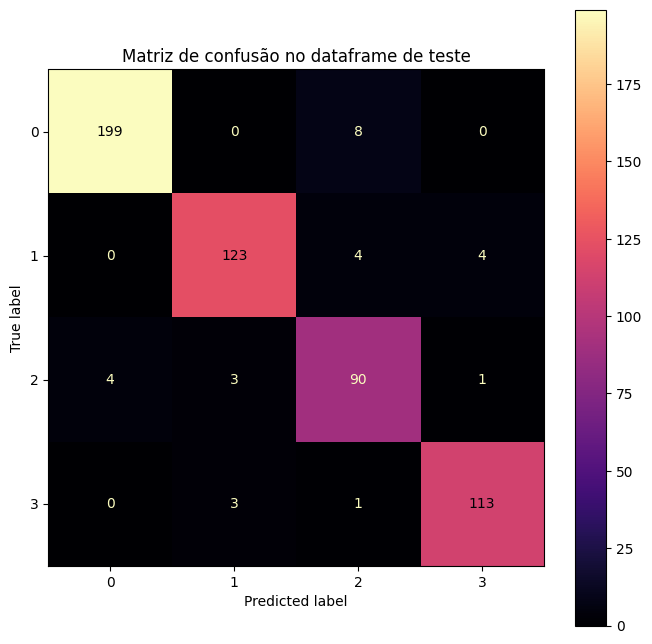

In [41]:
classificador_gs = xgb.XGBClassifier(booster="gbtree", learning_rate="0.01", max_depth=4, n_estimators=100, num_class=4)
modelo = fit(classificador_gs)
plot_matrix(modelo)
plot_matrix(modelo, treino=True)
confusion(modelo)

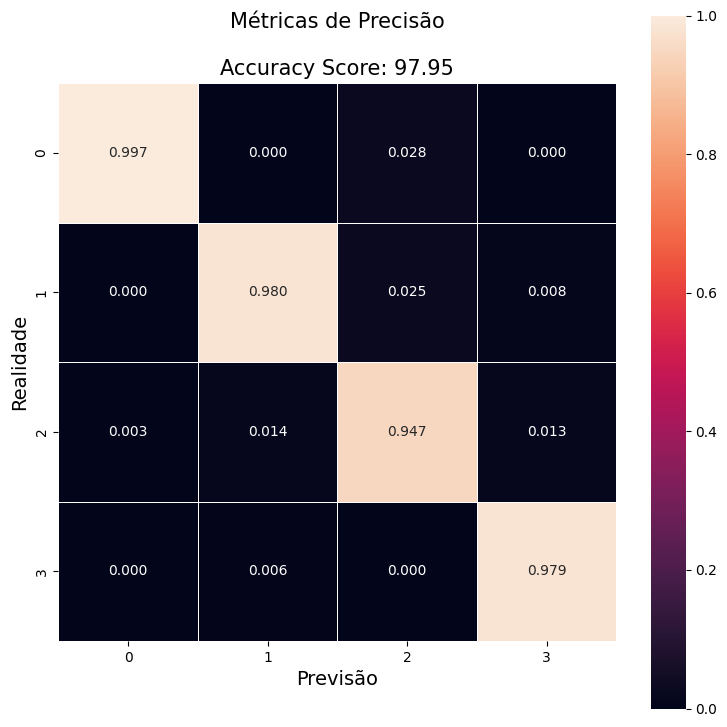

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       612
           1       0.98      0.97      0.97       361
           2       0.95      0.96      0.95       317
           3       0.98      0.99      0.99       369

    accuracy                           0.98      1659
   macro avg       0.98      0.98      0.98      1659
weighted avg       0.98      0.98      0.98      1659



In [295]:
plot_matrix(modelo, treino=True)

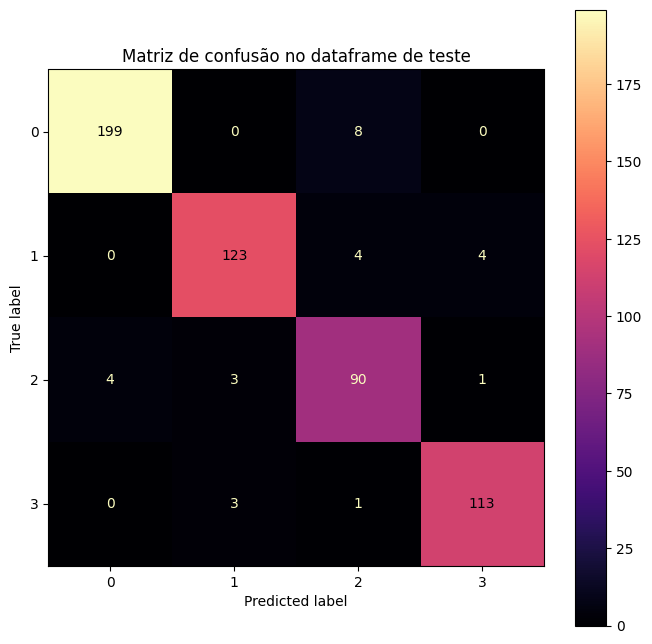

In [321]:
confusion(modelo)

Salvando o modelo em disco

In [322]:


# joblib.dump(modelo, "./modelos/modelo_gs")

['./modelos/modelo_gs']